# Chi Aqr JWST MIRI coronagraph offset
Calculations of X,Y offset for chi Aqr (PSF ref) offset target acquisition
for MIRI coronagraphs.

In [1]:
# Set up autoloader
%load_ext autoreload
%autoreload 2

In [27]:
# Set up modules and stuff
import numpy as np
import astropy.units as u
import compute_offsets as coff
from astropy.time import Time
from astropy.coordinates import SkyCoord, Distance

## JWST Parameters
This is the date range for the scheduled JWST observation, and camera configuration.

In [72]:
# JWST PA angle of the telescope V3 axis at time of observation
# V3PA range found in APT -> Visit Planner -> Reports -> Visit -> Total Roll
V3PA_TIME = 65.000     # Chosen V3PA at the time of observation
V3PA_TIME1 = 60.000    # Chosen V3PA at the beginning of JWST observing window
V3PA_TIME2 = 70.000    # Chosen V3PA at the end of JWST observing window

# Coronographic mask ids
CORON_ID_A = '1140' # ID for first coronagraphic observation
CORON_ID_B = '1550' # ID for second coronagraphic observation

In [73]:
# JWST dates and times
JWST_TIME = '2024-11-14T00:00:00.000'     # Time of observation
JWST_TIME1 = '2024-10-27T14:01:00.000'    # Beginning of JWST observing window
JWST_TIME2 = '2024-12-02T00:19:52.000'    # End of JWST observing window

# Create Time-like objects with the JWST times
jwst_time  = Time(JWST_TIME, format='isot', scale='utc')
jwst_time1 = Time(JWST_TIME1, format='isot', scale='utc')
jwst_time2 = Time(JWST_TIME2, format='isot', scale='utc')

## Reference coordinates for chi Aqr and offset star
We provide the most recent set of coordinates and proper motion for chi Aqr based on our VLBI observations. The acquisition star coordinates are from Gaia DR3.

In [74]:
# chi Aqr coordinates (Daia DR3)
RA = '349.2121666360522 degrees'     # RA in decimal degrees (ICRS)
DEC = '-7.7265601174932055 degrees'  # DEC in decimal degrees (ICRS) 
PMRA = -17.720811365972143           # Proper motion in RA (mas/yr)
PMDEC = -13.676336237987579          # Proper motion in DEC (mas/yr)
PARALLAX = 6.161173380222363         # Gaia DR3 Parallax (mas)
OBS_DATE = 2016.0                    # Observation date
EPOCH = 2016.0                       # Reference epoch
FRAME = 'icrs'                       # Coordinate frame

# Create Skycoord object with the given coordinates
c_aqr = SkyCoord(RA,
                 DEC,
                 pm_ra_cosdec=PMRA*u.mas/u.yr,
                 pm_dec=PMDEC*u.mas/u.yr,
                 distance=Distance(parallax=PARALLAX*u.mas),
                 equinox=Time(EPOCH, format='jyear'),
                 obstime=Time(OBS_DATE, format='jyear', scale='tcb'),
                 frame=FRAME
                )

In [75]:
# Gaia DR3 2630576351069481088 coordinates
RA = '349.2107023418036 degrees'     # RA in decimal degrees (ICRS)
DEC = '-7.718557169510248 degrees'   # DEC in decimal degrees (ICRS) 
PMRA = 2.7933311354700763            # Proper motion in RA (mas/yr)
PMDEC = -11.06568676574391           # Proper motion in DEC (mas/yr)
PARALLAX = 0.935161266446918         # Gaia DR3 Parallax (mas)
OBS_DATE = 2016.0                    # Observation date
EPOCH = 2016.0                       # Reference epoch
FRAME = 'icrs'                       # Coordinate frame

# Create Skycoord object with the given coordinates
acqt = SkyCoord(RA,
                DEC,
                pm_ra_cosdec=PMRA*u.mas/u.yr,
                pm_dec=PMDEC*u.mas/u.yr,
                distance=Distance(parallax=PARALLAX*u.mas),
                equinox=Time(EPOCH, format='jyear'),
                obstime=Time(OBS_DATE, format='jyear', scale='tcb'),
                frame=FRAME
            )

In [76]:
# Print offset between chi Aqr and Gaia DR3 2630576351069481088
# Based on their nominal coordinates and proper motions
offset = c_aqr.separation(acqt).to(u.arcsec)
pa_offset = c_aqr.position_angle(acqt).to(u.deg)
print(f'--> Total Offset with chi Aqr:   {offset:.6f}')
print(f'--> Position angle with chi Aqr: {pa_offset:.4f}')

--> Total Offset with chi Aqr:   29.280333 arcsec
--> Position angle with chi Aqr: 349.7232 deg


## Update coordinates for chi Aqr and acquisition star
Update position of chi Aqr and acquisition star to initial and final date of observing window. Use the apply_space_motion() method of the SkyCoord package. 

In [77]:
# Update Gaia DR3 coordinates of chi Aqr to JWST observing window
c_aqr_time = c_aqr.apply_space_motion(new_obstime=jwst_time)

# Update Gaia DR3 coordinates of chi Aqr to beggining of JWST observing window
c_aqr_time1 = c_aqr.apply_space_motion(new_obstime=jwst_time1)

# Update Gaia DR3 coordinates of chi Aqr to the end of JWST observing window
c_aqr_time2 = c_aqr.apply_space_motion(new_obstime=jwst_time2)

# Print chi Aqr change in  position during JWST observing window
offset_jwst = c_aqr_time2.separation(c_aqr_time1).to(u.mas)
pa_offset_jwst = c_aqr_time2.position_angle(c_aqr_time1).to(u.deg)
print('--> chi Aqr change in position during JWST observing window:')
print(f'--> Total Offset:   {offset_jwst:.3f}')
print(f'--> Position angle: {pa_offset_jwst:.2f}')

--> chi Aqr change in position during JWST observing window:
--> Total Offset:   2.171 mas
--> Position angle: 52.34 deg


In [78]:
# Update coordinates of acquisition star to JWST observing window
acqt_time = acqt.apply_space_motion(new_obstime=jwst_time)

# Update coordinates of acquisition star to beggining of JWST observing window
acqt_time1 = acqt.apply_space_motion(new_obstime=jwst_time1)

# Update coordinates of acquisition star to end of JWST observing window
acqt_time2 = acqt.apply_space_motion(new_obstime=jwst_time2)

# Print acquisition star change in  position during JWST observing window
offset_jwst = acqt_time2.separation(acqt_time1).to(u.mas)
pa_offset_jwst = acqt_time2.position_angle(acqt_time1).to(u.deg)
print('--> Acquisition star change in position during JWST observing window:')
print(f'--> Total Offset:   {offset_jwst:.3f}')
print(f'--> Position angle: {pa_offset_jwst:.2f}')

--> Acquisition star change in position during JWST observing window:
--> Total Offset:   1.107 mas
--> Position angle: 345.83 deg


In [79]:
# Print offset between chi Aqr and Gaia DR3 2630576351069481088
# Based on their nominal coordinates and proper motions at JWST observing time
offset_time = c_aqr_time.separation(acqt_time).to(u.arcsec)
pa_offset_time = c_aqr.position_angle(acqt_time).to(u.deg)
print(f'--> Total Offset with chi Aqr (obs. time):   {offset_time:.6f}')
print(f'--> Position angle with chi Aqr (obs. time): {pa_offset_time:.4f}')

--> Total Offset with chi Aqr (obs. time):   29.271230 arcsec
--> Position angle with chi Aqr (obs. time): 349.7367 deg


In [80]:
# Print offset between chi Aqr and Gaia DR3 2630576351069481088
# Based on their nominal coordinates and proper motions
offset_time1 = c_aqr_time2.separation(acqt_time1).to(u.arcsec)
pa_offset_time1 = c_aqr.position_angle(acqt_time1).to(u.deg)
print(f'--> Total Offset with chi Aqr (start window):   {offset_time1:.6f}')
print(f'--> Position angle with chi Aqr (start window): {pa_offset_time1:.4f}')

--> Total Offset with chi Aqr (start window):   29.272286 arcsec
--> Position angle with chi Aqr (start window): 349.7367 deg


In [81]:
# Print offset between chi Aqr and Gaia DR3 2630576351069481088
# Based on their nominal coordinates and proper motions
offset_time2 = c_aqr_time2.separation(acqt_time2).to(u.arcsec)
pa_offset_time2 = c_aqr.position_angle(acqt_time2).to(u.deg)
print(f'--> Total Offset with chi Aqr (end window):   {offset_time2:.6f}')
print(f'--> Position angle with chi Aqr (end window): {pa_offset_time2:.4f}')

--> Total Offset with chi Aqr (end window):   29.271182 arcsec
--> Position angle with chi Aqr (end window): 349.7368 deg


## Calculate APT offset for target acquisition
Uses the compute_offsets() script to calculate the dx and dy offset needed in APT to perform the target acquisition in offset from the acquisition star. This needs to be done for all JWST coronagraphs that need to be used, and for the time of beginning and end of the observing window. 

In [82]:
# Setup initial and final slew coordinates for offset script
CHI_AQR_RA = c_aqr_time.ra.deg
CHI_AQR_RA1 = c_aqr_time1.ra.deg
CHI_AQR_RA2 = c_aqr_time2.ra.deg
CHI_AQR_DEC = c_aqr_time.dec.deg
CHI_AQR_DEC1 = c_aqr_time1.dec.deg
CHI_AQR_DEC2 = c_aqr_time2.dec.deg
ACQT_RA = acqt_time.ra.deg
ACQT_RA1 = acqt_time1.ra.deg
ACQT_RA2 = acqt_time2.ra.deg
ACQT_DEC = acqt_time.dec.deg
ACQT_DEC1 = acqt_time1.dec.deg
ACQT_DEC2 = acqt_time2.dec.deg

# Setup initial and final slew coordinates for JWST observing time
slew_to = {'label': 'chi Aqr', 
           'position': SkyCoord(CHI_AQR_RA, CHI_AQR_DEC,
                                unit='deg', frame='icrs')
          }
slew_from = {'label': 'Acquisition Star', 
             'position': SkyCoord(ACQT_RA, ACQT_DEC,
                                  unit='deg', frame='icrs')
             }

# Setup initial and final slew coordinates for beginning of observing window
slew_to1 = {'label': 'chi Aqr', 
            'position': SkyCoord(CHI_AQR_RA1, CHI_AQR_DEC1,
                                 unit='deg', frame='icrs')
          }

slew_from1 = {'label': 'Acquisition Star', 
              'position': SkyCoord(ACQT_RA1, ACQT_DEC1,
                                   unit='deg', frame='icrs')
             }

# Setup initial and final slew coordinates for end of observing window
slew_to2 = {'label': 'chi Aqr', 
            'position': SkyCoord(CHI_AQR_RA2, CHI_AQR_DEC2,
                                 unit='deg', frame='icrs')
          }

slew_from2 = {'label': 'Acquisition Star', 
              'position': SkyCoord(ACQT_RA2, ACQT_DEC2,
                                   unit='deg', frame='icrs')
             }

In [83]:
# Decide if plotting or not
SHOW_PLOTS = True
PLOT_FULL = True

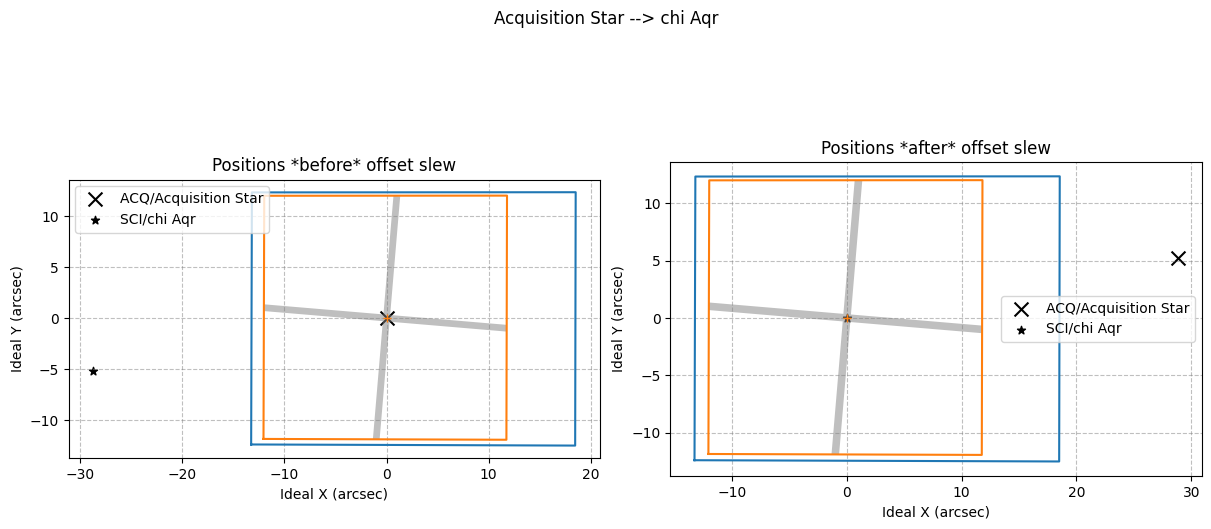

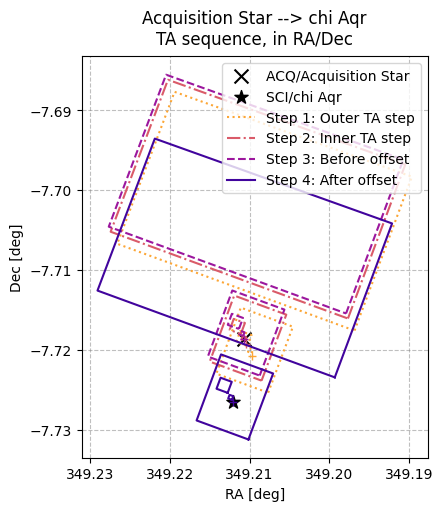

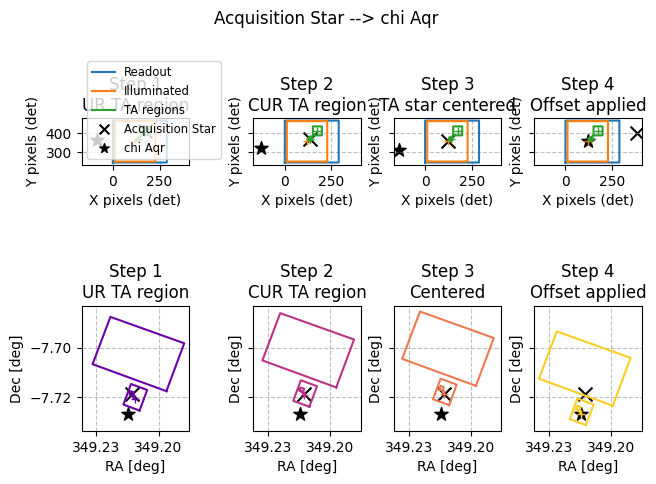

<<<==========================================================>>>
<<<==========================================================>>>
--> Offset for 4QPM 11.4 um mask at JWST observing time:
--> Delta X: +28.80445 arcsec
--> Delta Y: +5.20686 arcsec
<<<==========================================================>>>
<<<==========================================================>>>


In [84]:
# Calculate offsets for 4QPM 11.4 um mask at JWST observing time
dx, dy = coff.compute_offsets(slew_from,
                              slew_to,
                              V3PA_TIME,
                              CORON_ID_A,
                              verbose = False,
                              show_plots = SHOW_PLOTS,
                              plot_full = PLOT_FULL,
                              return_offsets = True
                              )

# Print offsets
print('<<<==========================================================>>>')
print('<<<==========================================================>>>')
print(f'--> Offset for 4QPM 11.4 um mask at JWST observing time:')
print(f'--> Delta X: {dx:+4.5f} arcsec')
print(f'--> Delta Y: {dy:+4.5f} arcsec')
print('<<<==========================================================>>>')
print('<<<==========================================================>>>')

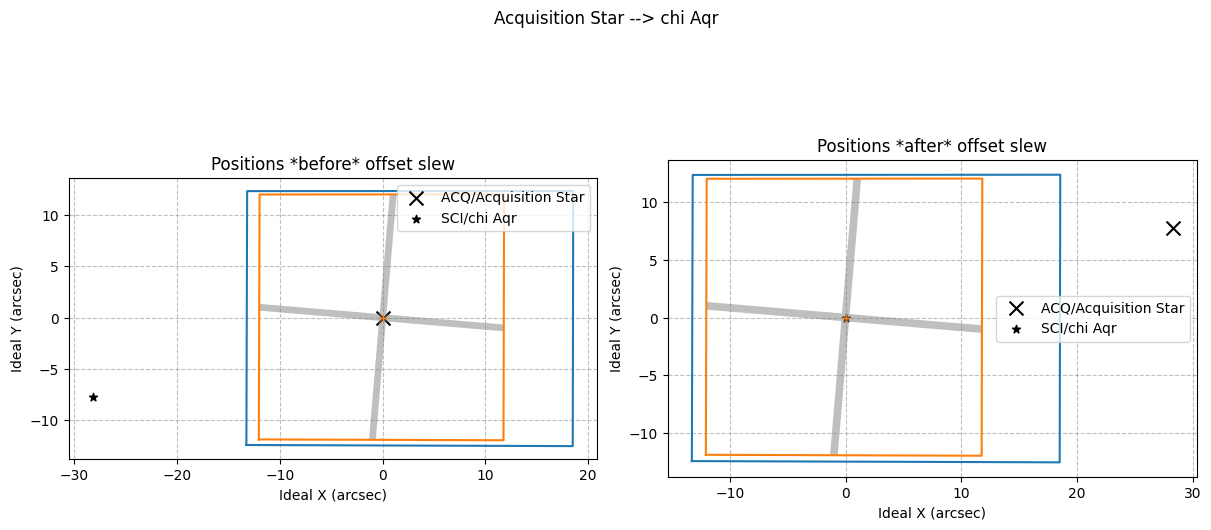

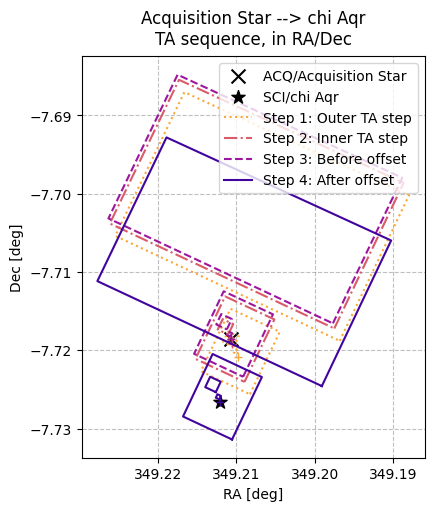

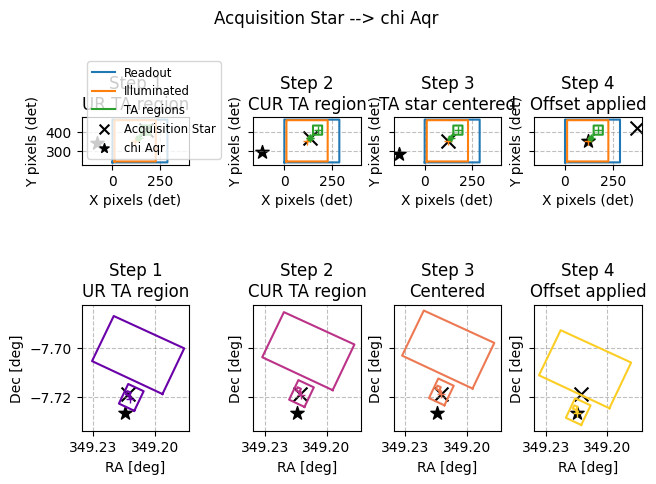

<<<==========================================================>>>
--> Offset for 4QPM 11.4 um mask at JWST observing window start:
--> Delta X: +28.24134 arcsec
--> Delta Y: +7.69658 arcsec
<<<==========================================================>>>


In [85]:
# Calculate offsets for 4QPM 11.4 um mask at JWST observing window start
dx, dy = coff.compute_offsets(slew_from1,
                              slew_to1,
                              V3PA_TIME1,
                              CORON_ID_A,
                              verbose = False,
                              show_plots = SHOW_PLOTS,
                              plot_full = PLOT_FULL,
                              return_offsets = True
                              )

# Print offsets
print('<<<==========================================================>>>')
print(f'--> Offset for 4QPM 11.4 um mask at JWST observing window start:')
print(f'--> Delta X: {dx:+4.5f} arcsec')
print(f'--> Delta Y: {dy:+4.5f} arcsec')
print('<<<==========================================================>>>')

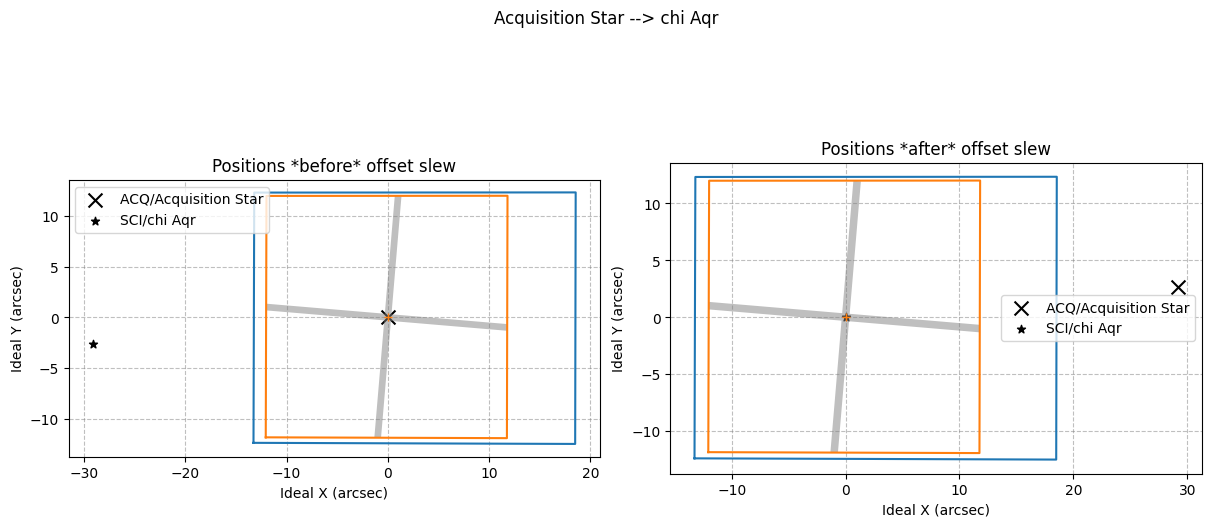

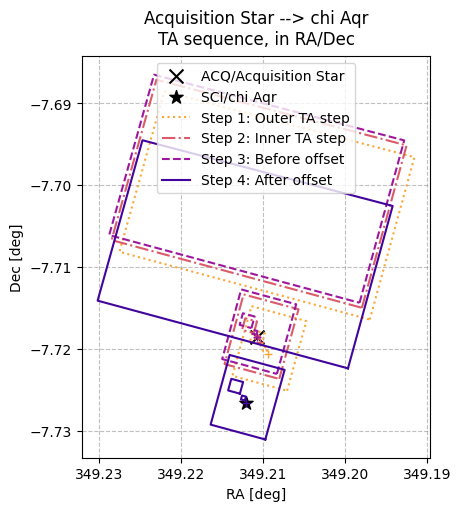

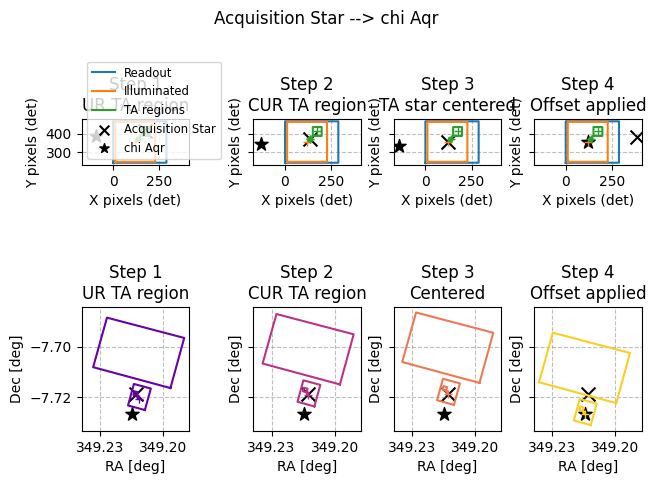

<<<==========================================================>>>
--> Offset for 4QPM 11.4 um mask at JWST observing window end:
--> Delta X: +29.14851 arcsec
--> Delta Y: +2.67759 arcsec
<<<==========================================================>>>


In [86]:
# Calculate offsets for 4QPM 11.4 um mask at JWST observing window end
dx, dy = coff.compute_offsets(slew_from2,
                              slew_to2,
                              V3PA_TIME2,
                              CORON_ID_A,
                              verbose = False,
                              show_plots = SHOW_PLOTS,
                              plot_full = PLOT_FULL,
                              return_offsets = True
                              )

# Print offsets
print('<<<==========================================================>>>')
print(f'--> Offset for 4QPM 11.4 um mask at JWST observing window end:')
print(f'--> Delta X: {dx:+4.5f} arcsec')
print(f'--> Delta Y: {dy:+4.5f} arcsec')
print('<<<==========================================================>>>')

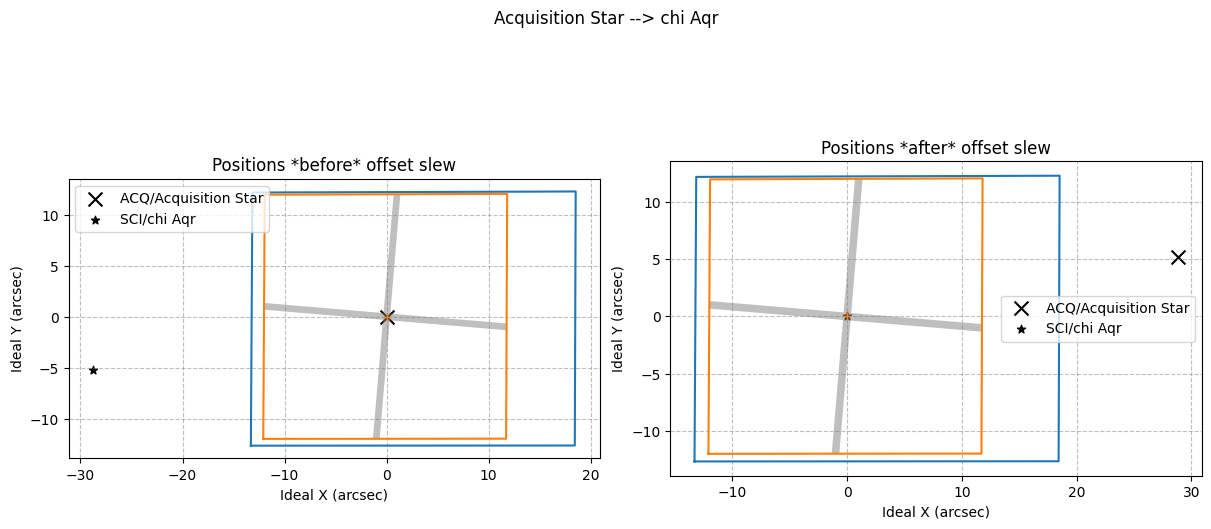

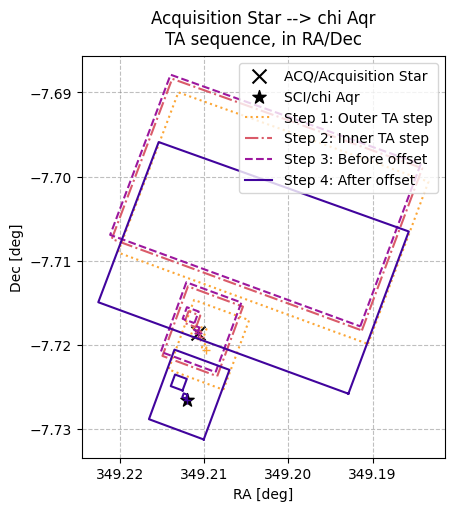

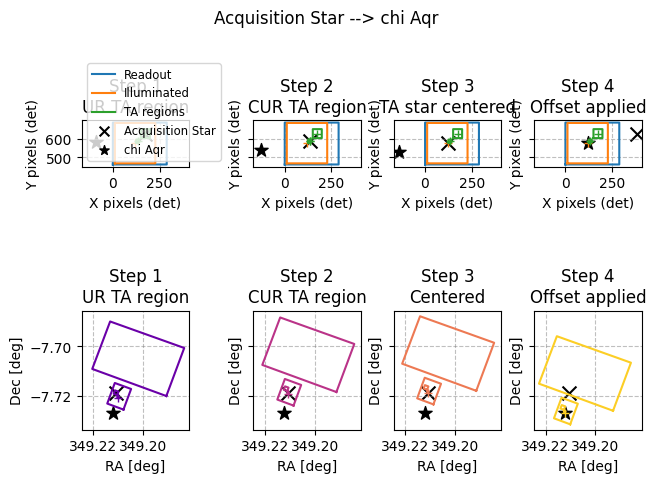

<<<==========================================================>>>
<<<==========================================================>>>
--> Offset for 4QPM 15.5 um mask at JWST observing time:
--> Delta X: +28.80445 arcsec
--> Delta Y: +5.20687 arcsec
<<<==========================================================>>>
<<<==========================================================>>>


In [87]:
# Calculate offsets for 4QPM 15.5 um mask at JWST observing time
dx, dy = coff.compute_offsets(slew_from,
                              slew_to,
                              V3PA_TIME,
                              CORON_ID_B,
                              verbose = False,
                              show_plots = SHOW_PLOTS,
                              plot_full = PLOT_FULL,
                              return_offsets = True
                              )

# Print offsets
print('<<<==========================================================>>>')
print('<<<==========================================================>>>')
print(f'--> Offset for 4QPM 15.5 um mask at JWST observing time:')
print(f'--> Delta X: {dx:+4.5f} arcsec')
print(f'--> Delta Y: {dy:+4.5f} arcsec')
print('<<<==========================================================>>>')
print('<<<==========================================================>>>')

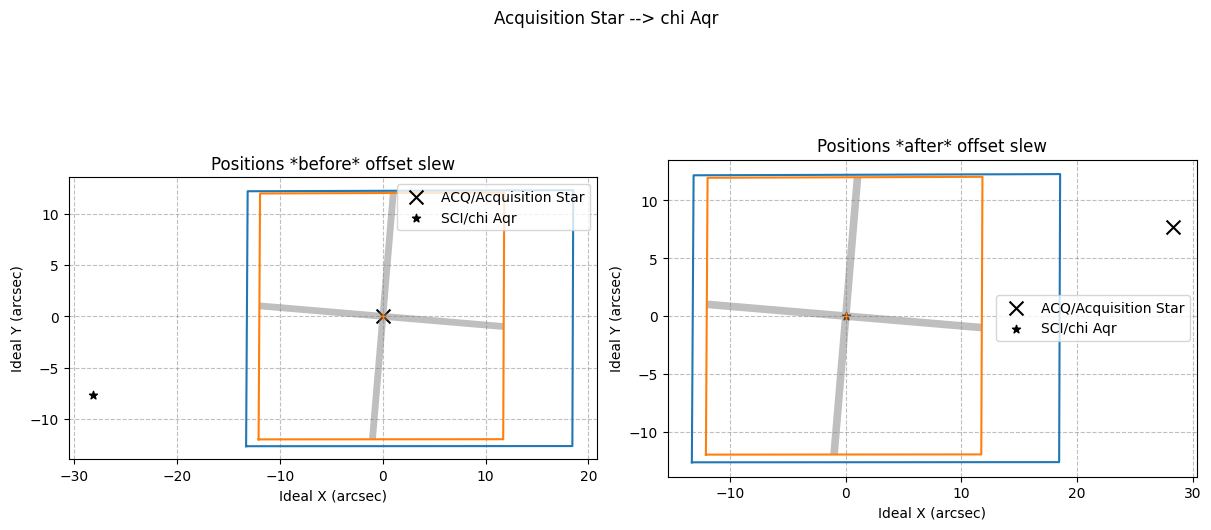

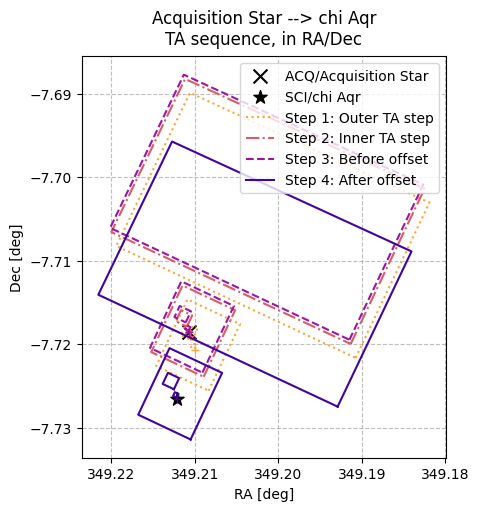

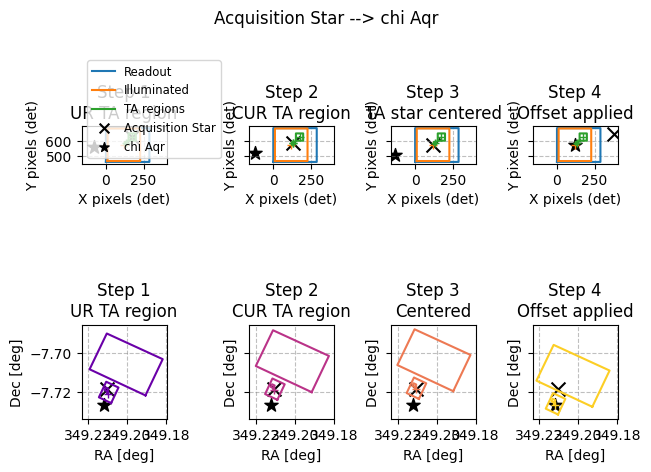

<<<==========================================================>>>
--> Offset for 4QPM 15.5 um mask at JWST observing window start:
--> Delta X: +28.24133 arcsec
--> Delta Y: +7.69658 arcsec
<<<==========================================================>>>


In [88]:
# Calculate offsets for 4QPM 15.5 um mask at JWST observing window start
dx, dy = coff.compute_offsets(slew_from1,
                              slew_to1,
                              V3PA_TIME1,
                              CORON_ID_B,
                              verbose = False,
                              show_plots = SHOW_PLOTS,
                              plot_full = PLOT_FULL,
                              return_offsets = True
                              )

# Print offsets
print('<<<==========================================================>>>')
print(f'--> Offset for 4QPM 15.5 um mask at JWST observing window start:')
print(f'--> Delta X: {dx:+4.5f} arcsec')
print(f'--> Delta Y: {dy:+4.5f} arcsec')
print('<<<==========================================================>>>')

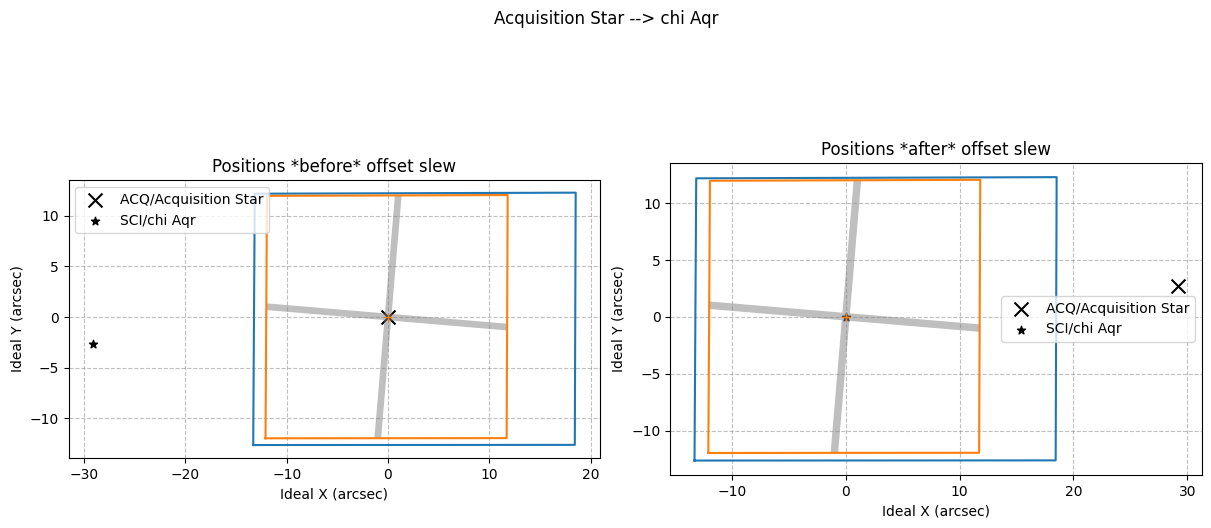

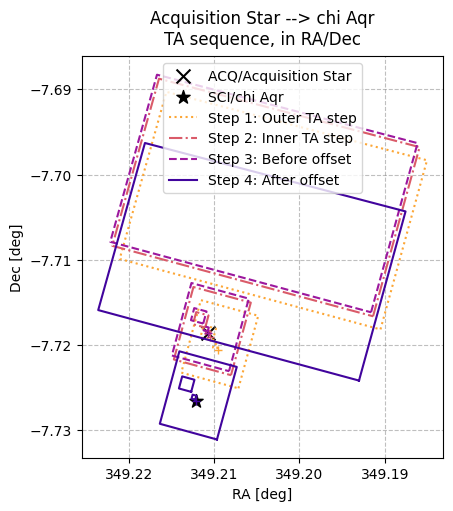

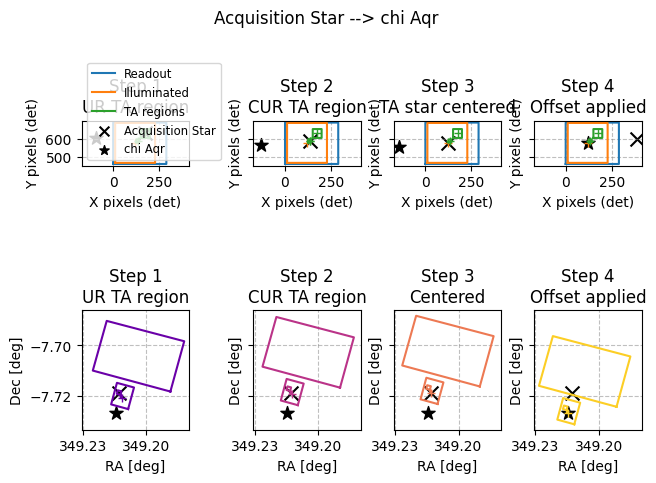

<<<==========================================================>>>
--> Offset for 4QPM 15.5 um mask at JWST observing window end:
--> Delta X: +29.14851 arcsec
--> Delta Y: +2.67759 arcsec
<<<==========================================================>>>


In [89]:
# Calculate offsets for 4QPM 15.5 um mask at JWST observing window start
dx, dy = coff.compute_offsets(slew_from2,
                              slew_to2,
                              V3PA_TIME2,
                              CORON_ID_B,
                              verbose = False,
                              show_plots = SHOW_PLOTS,
                              plot_full = PLOT_FULL,
                              return_offsets = True
                              )

# Print offsets
print('<<<==========================================================>>>')
print(f'--> Offset for 4QPM 15.5 um mask at JWST observing window end:')
print(f'--> Delta X: {dx:+4.5f} arcsec')
print(f'--> Delta Y: {dy:+4.5f} arcsec')
print('<<<==========================================================>>>')